#### Q1. Read the five provided datasets

Read the five provided datasets using `pandas.read_csv()` and save the data to `pandas.DataFrame` variables. Additionally, measure the time taken to read each dataset for later use.  You can use `time()` function to measure running time.
datasets path are: 

/shared-data/Apr20/data/Module3/data0.csv

/shared-data/Apr20/data/Module3/data1.csv

/shared-data/Apr20/data/Module3/data2.csv

/shared-data/Apr20/data/Module3/data3.csv

/shared-data/Apr20/data/Module3/data4.csv

In [1]:
import pandas as pd
from time import time


# TODO: Read the five datasets using pd.read_csv()
# get the start time
st = time()
df0 = pd.read_csv('/shared-data/Apr20/data/Module3/data0.csv')
et1 = time()
df1 = pd.read_csv('/shared-data/Apr20/data/Module3/data1.csv')
et2 = time()
df2 = pd.read_csv('/shared-data/Apr20/data/Module3/data2.csv')
et3 = time()
df3 = pd.read_csv('/shared-data/Apr20/data/Module3/data3.csv')
et4 = time()
df4 = pd.read_csv('/shared-data/Apr20/data/Module3/data4.csv')
et5 = time()
# append running times of each dataset to pd_running_times

pd_running_times = [et1-st, et2-st, et3-st, et4-st, et5-st]

#### Q2. Read datasets with cuDF

Read the five datasets with `cudf.read_csv()` function in `cuDF` library and save the data into `cudf.DataFrame` variables. Additionally, measure the time taken to read each dataset for later use.



In [2]:
import cudf

# TODO: Read the five datasets using cudf.read_csv()
# get the start time
st = time()
cudf0 = cudf.read_csv('/shared-data/Apr20/data/Module3/data0.csv')
et1 = time()
cudf1 = cudf.read_csv('/shared-data/Apr20/data/Module3/data1.csv')
et2 = time()
cudf2 = cudf.read_csv('/shared-data/Apr20/data/Module3/data2.csv')
et3 = time()
cudf3 = cudf.read_csv('/shared-data/Apr20/data/Module3/data3.csv')
et4 = time()
cudf4 = cudf.read_csv('/shared-data/Apr20/data/Module3/data4.csv')
et5 = time()
# append running times of each dataset to cudf_running_times
cudf_running_times = [et1-st, et2-st, et3-st, et4-st, et5-st] 

#### Q3. Plot the values

Now that we have performed csv read with both pandas and cuML. Let us plot these values to see if we can find a trend!

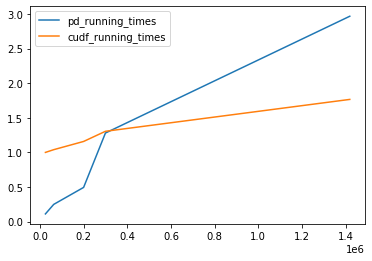

In [3]:
import matplotlib.pyplot as plt

X = [25000 , 63115, 200000, 300000, 1419554]
#X is number of lines of data in each data{0, 1, 2, 3, 4}.csv file

y = pd_running_times
z = cudf_running_times

#TODO: Plot a simultaneous graph with values of running times to read data of both pandas and cudf, i.e., pd_running_times and cudf_running_times
plt.plot(X,y,label='pd_running_times')
plt.plot(X,z,label='cudf_running_times')
plt.legend()
#X axis is the number of lines and Y axis has the time in milliseconds. Provide a legend to differentiate pd_running_times and cudf_running_times

In [4]:
st = time()
df0 = pd.read_csv('/shared-data/Apr20/data/Module3/data0.csv')
et1 = time()
df1 = pd.read_csv('/shared-data/Apr20/data/Module3/data1.csv')
et2 = time()
df2 = pd.read_csv('/shared-data/Apr20/data/Module3/data2.csv')
et3 = time()
df3 = pd.read_csv('/shared-data/Apr20/data/Module3/data3.csv')
et4 = time()
df4 = pd.read_csv('/shared-data/Apr20/data/Module3/data4.csv')
et5 = time()
# append running times of each dataset to pd_running_times

pd_running_times = [et1-st, et2-st, et3-st, et4-st, et5-st]

In [5]:
st = time()
cudf0 = cudf.read_csv('/shared-data/Apr20/data/Module3/data0.csv')
et1 = time()
cudf1 = cudf.read_csv('/shared-data/Apr20/data/Module3/data1.csv')
et2 = time()
cudf2 = cudf.read_csv('/shared-data/Apr20/data/Module3/data2.csv')
et3 = time()
cudf3 = cudf.read_csv('/shared-data/Apr20/data/Module3/data3.csv')
et4 = time()
cudf4 = cudf.read_csv('/shared-data/Apr20/data/Module3/data4.csv')
et5 = time()
# append running times of each dataset to cudf_running_times
cudf_running_times = [et1-st, et2-st, et3-st, et4-st, et5-st]

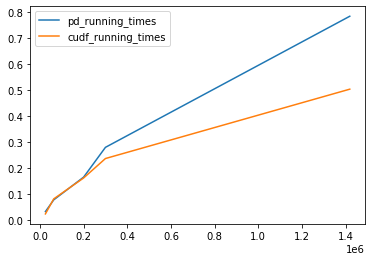

In [6]:
y = pd_running_times
z = cudf_running_times

#TODO: Plot a simultaneous graph with values of running times to read data of both pandas and cudf, i.e., pd_running_times and cudf_running_times
plt.plot(X,y,label='pd_running_times')
plt.plot(X,z,label='cudf_running_times')
plt.legend()

### Why is the first csv read using cuDF is slower than pandas?
what's happening here is that the first cuDF operation that you run that uses the GPU implicitly initializes the CUDA driver, the CUDA runtime, creates a CUDA context, and copies over static data like lookup tables and whatnot to GPU memory. All of this adds up to a few hundred milliseconds of overhead depending on the exact machine. Unfortunately, there isn't really anything we can do to speed this up.

The one thing you could do is enable persistence mode on your machine which prevents the GPU from going into an "idle" type of mode and leads to slower startups, but you'd still have all of the overheads mentioned above. See here for more info on persistence mode: https://docs.nvidia.com/deploy/driver-persistence/index.html#persistence-daemon